In [14]:
## We are importing the libraries: numpy (scientific computing) and matplotlib (plotting)
import numpy as np
import matplotlib.pyplot as plt

In [16]:
np.random.seed(0)  # For reproducibility

In [17]:
# Dogs: higher ear flappiness index, lower whisker length
dogs_whisker_length = np.random.normal(loc=5, scale=1, size=10)
dogs_ear_flappiness_index = np.random.normal(loc=8, scale=1, size=10)

In [18]:
dogs_whisker_length

array([6.76405235, 5.40015721, 5.97873798, 7.2408932 , 6.86755799,
       4.02272212, 5.95008842, 4.84864279, 4.89678115, 5.4105985 ])

In [19]:
dogs_ear_flappiness_index

array([8.14404357, 9.45427351, 8.76103773, 8.12167502, 8.44386323,
       8.33367433, 9.49407907, 7.79484174, 8.3130677 , 7.14590426])

In [21]:
# Cats: lower ear flappiness index, higher whisker length
cats_whisker_length = np.random.normal(loc=8, scale=1, size=10)
cats_ear_flappiness_index = np.random.normal(loc=5, scale=1, size=10)


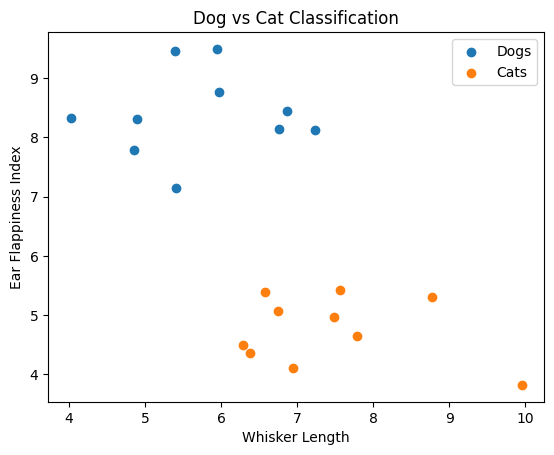

In [23]:
# Plot the data points
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification')
plt.legend()
plt.show()

In [6]:
# Implementing random linear classifier algorithm
def random_linear_classifier(data_dogs, data_cats, k, d):
    # d is the number of features
    best_error = float('inf')
    best_theta = None
    best_theta0 = None
    
    for _ in range(k):
        theta = np.random.normal(size=d)
        theta0 = np.random.normal()
        
        error = compute_error(data_dogs, data_cats, theta, theta0)
        
        if error < best_error:
            best_error = error
            best_theta = theta
            best_theta0 = theta0
    
    return best_theta, best_theta0

In [7]:
def compute_error(data_dogs, data_cats, theta, theta0):
    error = 0
    for x_dog in data_dogs:
        if np.dot(theta, x_dog) + theta0 <= 0:
            error += 1
    for x_cat in data_cats:
        if np.dot(theta, x_cat) + theta0 > 0:
            error += 1
    return error

In [24]:
# Prepare data for algorithm
dogs_data = np.vstack((dogs_whisker_length, dogs_ear_flappiness_index)).T
cats_data = np.vstack((cats_whisker_length, cats_ear_flappiness_index)).T

In [25]:
dogs_data

array([[6.76405235, 8.14404357],
       [5.40015721, 9.45427351],
       [5.97873798, 8.76103773],
       [7.2408932 , 8.12167502],
       [6.86755799, 8.44386323],
       [4.02272212, 8.33367433],
       [5.95008842, 9.49407907],
       [4.84864279, 7.79484174],
       [4.89678115, 8.3130677 ],
       [5.4105985 , 7.14590426]])

In [26]:
cats_data

array([[6.95144703, 4.10453344],
       [6.57998206, 5.3869025 ],
       [6.29372981, 4.48919486],
       [9.9507754 , 3.81936782],
       [7.49034782, 4.97181777],
       [7.5619257 , 5.42833187],
       [6.74720464, 5.06651722],
       [8.77749036, 5.3024719 ],
       [6.38610215, 4.36567791],
       [7.78725972, 4.63725883]])

In [32]:
# Run random linear classifier algorithm
k = 200  # Number of iterations
d = 2  # Number of features
best_theta, best_theta0 = random_linear_classifier(dogs_data, cats_data, k, d)


In [33]:
best_theta

array([-1.47183501,  1.64813493])

In [34]:
best_theta0

0.16422775548733395

In [35]:
# Plot the decision boundary
x_vals = np.linspace(2, 10, 100)
y_vals = (-best_theta[0] / best_theta[1]) * x_vals - (best_theta0 / best_theta[1])


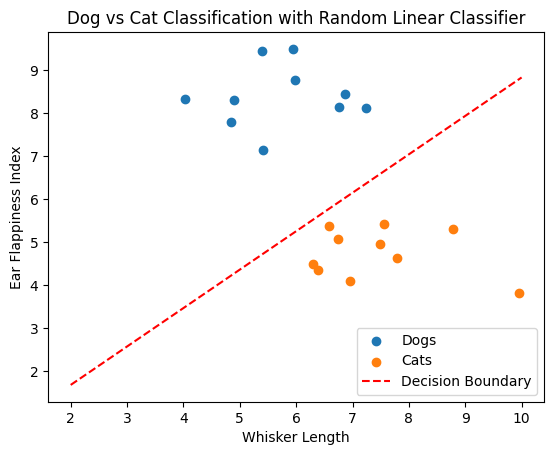

In [36]:
plt.scatter(dogs_whisker_length, dogs_ear_flappiness_index, label='Dogs')
plt.scatter(cats_whisker_length, cats_ear_flappiness_index, label='Cats')
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Decision Boundary')
plt.xlabel('Whisker Length')
plt.ylabel('Ear Flappiness Index')
plt.title('Dog vs Cat Classification with Random Linear Classifier')
plt.legend()
plt.show()